In [1]:
### from datetime import datetime
from os import environ
from os.path import join

import json

# YES/NO data dictionary

YES = 1
NO = 2
NOT_APPLY = 97
IGNORED = 98
NOT_SPECIFIED = 99


# Laboratory result dictionary
LAB_POSITIVE  = 1
LAB_NO_POSITIVE = 2
LAB_PENDING_RESULT = 3
LAB_WRONG_RESULT = 4
LAB_NOT_APPLY = 97 # CASO SIN MUESTRA


months = ["",
          "Enero",
          "Febrero",
          "Marzo",
          "Abril",
          "Mayo",
          "Junio",
          "Julio",
          "Agosto",
          "Septiembre",
          "Octubre",
          "Noviembre",
          "Diciembre"]


In [2]:
input_folder = environ.get('CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = environ.get('CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output')
settings_path = join(input_folder, 'settings.json')
d = json.load(open(settings_path, 'rt'))
d

{'utility_name': 'Impacto de COVID 19 en Mexico'}

In [3]:
from datetime import datetime
now = datetime.now()
report_day = f'{now.day} de {months[now.month]} del {now.year}'

with open(join(output_folder, 'report_date.txt'), 'wt') as report_date_file:
    report_date_file.write(report_day)

In [4]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

covid_zip_data = 'data/datos_abiertos_covid19.zip'

covid_pd = pd.read_csv(covid_zip_data, compression='zip', header=0, )
covid_pd.set_index('ID_REGISTRO')

# covid_pd.groupby('RESULTADO_LAB').size()
covid_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852082 entries, 0 to 6852081
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

# Total de Casos y Mortalidad padecimiento

In [5]:
import matplotlib.pyplot as plt

cv19_confirmed_cases  = covid_pd[covid_pd['RESULTADO_LAB'] == YES]

pneumonia_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['NEUMONIA'] == YES]
diabetes_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['DIABETES'] == YES]
epoc_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['EPOC'] == YES]
asma_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['ASMA'] == YES]
inmusupr_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['INMUSUPR'] == YES]
hyper_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['HIPERTENSION'] == YES]
# others_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['OTRAS_COM'] == YES]
cardio_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['CARDIOVASCULAR'] == YES]
obesity_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['OBESIDAD'] == YES]
renal_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['RENAL_CRONICA'] == YES]

# 
smoking_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['TABAQUISMO'] == YES]



TOTAL_POSITIVE_COV19_CASES = cv19_confirmed_cases.shape[0] # len(list(filter(lambda x: x, covid_pd['RESULTADO_LAB'] == YES)))
TOTAL_PNEUMONIA_CASES = pneumonia_confirmed_cases.shape[0]

print(TOTAL_POSITIVE_COV19_CASES)

def percentage_died(df):
  part = who_died(df).shape[0]
  whole = df.shape[0]
  percentage = 100 * float(part)/float(whole)
  return f'{int(percentage)}%'

def who_died(df):
    return df[df['FECHA_DEF'] != '9999-99-99']

diseases_dfs = [
        diabetes_confirmed_cases,
        # pneumonia_confirmed_cases,
        epoc_confirmed_cases, 
        asma_confirmed_cases,
        inmusupr_confirmed_cases,
        hyper_confirmed_cases,
        cardio_confirmed_cases,
        obesity_confirmed_cases,
        renal_confirmed_cases,
        smoking_confirmed_cases,
]


_ = lambda value: '{:,.2f}'.format(value).split('.')[0] if type(value) != str else value

cases_by_disease = pd.DataFrame.from_dict({
    'Padecimiento': ['Diabetes', 
                     # 'Neumonía', 
                     'EPOC', 'Asma', 'Inmunosupresión', 'Hipertensión', 'Cardiovascular', 
                     'Obesidad', 'Renal Crónica', 'Tabaquismo'],
    'Positivos': [
        diabetes_confirmed_cases.shape[0],
        # pneumonia_confirmed_cases.shape[0],
        epoc_confirmed_cases.shape[0], 
        asma_confirmed_cases.shape[0],
        inmusupr_confirmed_cases.shape[0],
        hyper_confirmed_cases.shape[0],
        cardio_confirmed_cases.shape[0],
        obesity_confirmed_cases.shape[0],
        renal_confirmed_cases.shape[0],
        smoking_confirmed_cases.shape[0],
    ],
    'Muertes': [
        who_died(diabetes_confirmed_cases).shape[0],
        # who_died(pneumonia_confirmed_cases).shape[0],
        who_died(epoc_confirmed_cases).shape[0], 
        who_died(asma_confirmed_cases).shape[0],
        who_died(inmusupr_confirmed_cases).shape[0],
        who_died(hyper_confirmed_cases).shape[0],
        who_died(cardio_confirmed_cases).shape[0],
        who_died(obesity_confirmed_cases).shape[0],
        who_died(renal_confirmed_cases).shape[0],
        who_died(smoking_confirmed_cases).shape[0],
    ],
    'Porcentaje de Muerte': [
        percentage_died(diabetes_confirmed_cases),
        # percentage_died(pneumonia_confirmed_cases),
        percentage_died(epoc_confirmed_cases), 
        percentage_died(asma_confirmed_cases),
        percentage_died(inmusupr_confirmed_cases),
        percentage_died(hyper_confirmed_cases),
        percentage_died(cardio_confirmed_cases),
        percentage_died(obesity_confirmed_cases),
        percentage_died(renal_confirmed_cases),
        percentage_died(smoking_confirmed_cases),
    ],
})

cases_by_disease = cases_by_disease.set_index('Padecimiento')
# cases_by_disease = cases_by_disease.astype({'Positivos': float, 'Muertes' : float})
cases_by_disease.applymap(_).to_csv(join(output_folder, 'table1.csv'))


cases_by_disease.applymap(_)

1673168


,Positivos,Muertes,Porcentaje de Muerte
Padecimiento,,,
Diabetes,"245,588","69,029",28%
EPOC,"21,514","8,196",38%
Asma,"39,092","3,319",8%
Inmunosupresión,"15,704","4,092",26%
Hipertensión,"316,918","83,427",26%
Cardiovascular,"29,554","9,360",31%
Obesidad,"265,620","41,392",15%
Renal Crónica,"28,788","12,271",42%
Tabaquismo,"119,257","14,174",11%


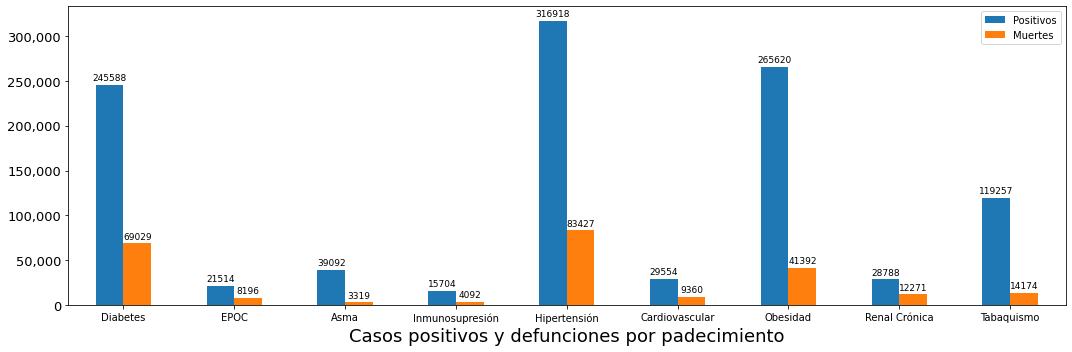

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter


cases_by_disease

ax = cases_by_disease.plot.bar(rot=0, figsize=(15,5))

plt.yticks(fontsize = 13)
plt.xlabel('Casos positivos y defunciones por padecimiento', fontsize = 18)



# add value label to each bar, displayng its height
for p in ax.patches:
    ax.annotate(p.get_height(),
                         (p.get_x() + p.get_width()/2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0,7), textcoords = 'offset points', size=9)
    
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

# save Figure 7 as an image
plt.savefig(join(output_folder, 'figure1.png'))

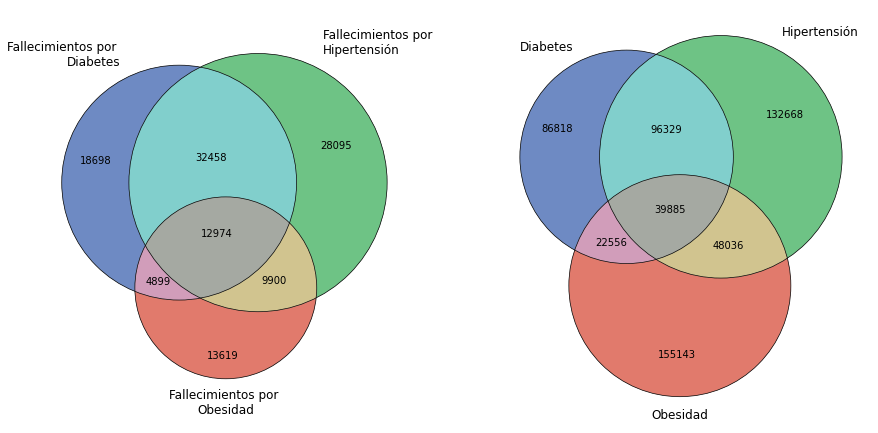

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

<Figure size 432x288 with 0 Axes>

In [12]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib.pyplot import gca

major_diseases = [set(diabetes_confirmed_cases['ID_REGISTRO']), 
             set(hyper_confirmed_cases['ID_REGISTRO']), 
             set(obesity_confirmed_cases['ID_REGISTRO'])]

major_diseases_deaths = [set(who_died(diabetes_confirmed_cases)['ID_REGISTRO']), 
             set(who_died(hyper_confirmed_cases)['ID_REGISTRO']), 
             set(who_died(obesity_confirmed_cases)['ID_REGISTRO'])]
fig, axes = plt.subplots(1, 2, figsize=(15, 15))



venn3(major_diseases,
      set_colors=('#3E64AF', '#3EAF5D', '#D74E3B'), 
      set_labels = ('Diabetes', 
                    'Hipertensión',
                    'Obesidad',
                   ),
      alpha=0.75,
     )


venn3_circles(major_diseases, lw=0.7)


plt.subplot(1, 2, 1)

venn3(major_diseases_deaths,
      set_colors=('#3E64AF', '#3EAF5D', '#D74E3B'), 
      set_labels = ('Fallecimientos por \nDiabetes', 
                    'Fallecimientos por \nHipertensión',
                    'Fallecimientos por \nObesidad'),
      alpha=0.75)


venn3_circles(major_diseases_deaths, lw=0.7)

plt.show()

plt.tight_layout()

plt.savefig(join(output_folder, 'figure2.png'), bbox_inches='tight')

axes

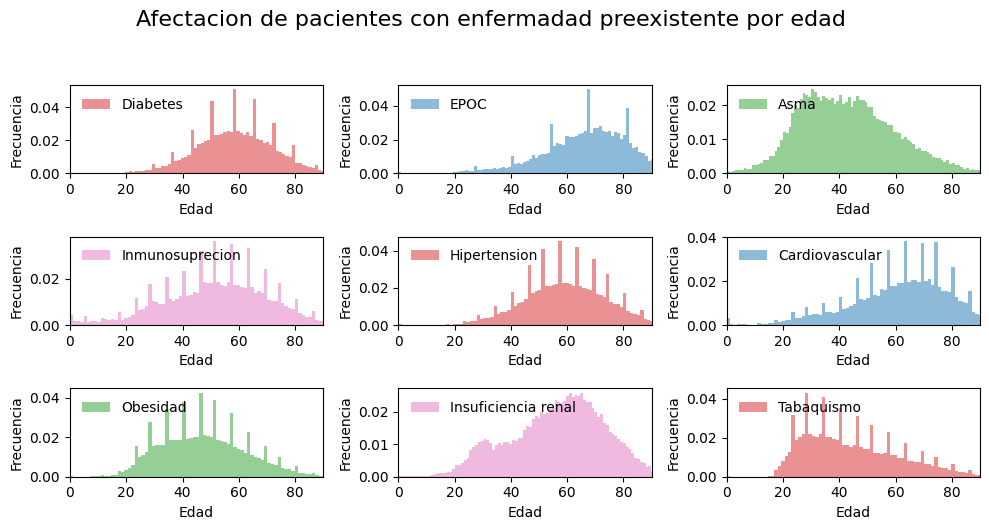

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6), dpi=100)

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

disease_title = [
    'Diabetes',
    'EPOC',
    'Asma', 
    'Inmunosuprecion',
    'Hipertension',
    'Cardiovascular',
    'Obesidad',
    'Insuficiencia renal',
    'Tabaquismo'
    
]

for i, (ax, df) in enumerate(zip(axes.flatten(), diseases_dfs)):
    ax.hist(df['EDAD'], alpha=0.5, bins=100, density=True, stacked=True, label=disease_title[i], color=colors[ i % 4])
    ax.set_xlabel("Edad")
    ax.set_ylabel("Frecuencia")
    ax.legend(loc='upper left', frameon=False)

    # ax.set_title(disease_title[i])
    ax.set_xlim(0, 90);

    
plt.suptitle('Afectacion de pacientes con enfermadad preexistente por edad ', y=1.05, size=16)


plt.tight_layout();

plt.savefig(join(output_folder, 'figure3.png'), bbox_inches='tight')

#diabetes_confirmed_cases

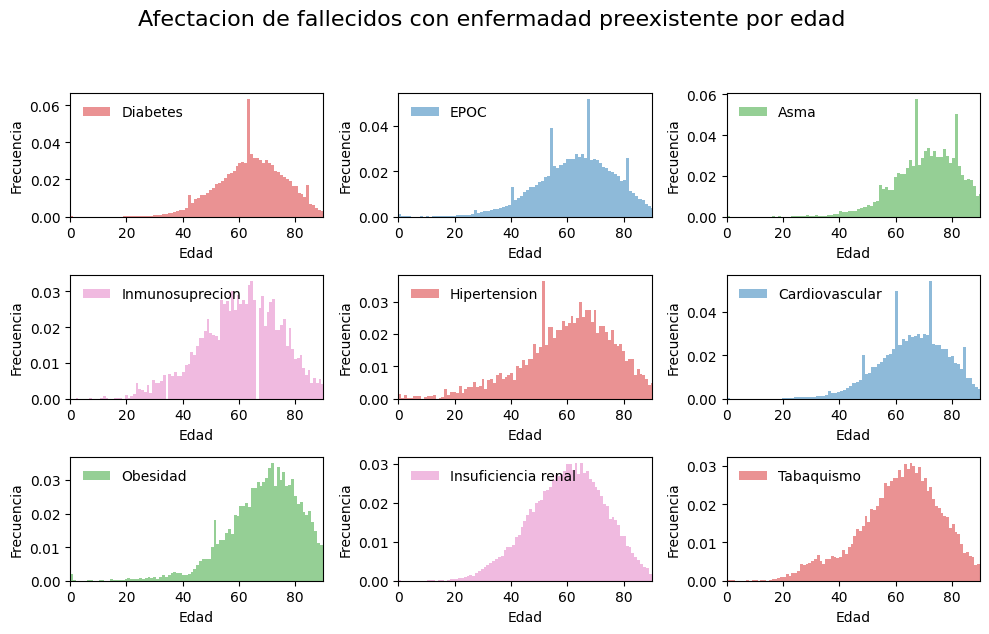

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6), dpi=100)

diseases_dfs = [
    who_died(diabetes_confirmed_cases),
    who_died(pneumonia_confirmed_cases),
    who_died(epoc_confirmed_cases), 
    who_died(asma_confirmed_cases),
    who_died(inmusupr_confirmed_cases),
    who_died(hyper_confirmed_cases),
    who_died(cardio_confirmed_cases),
    who_died(obesity_confirmed_cases),
    who_died(renal_confirmed_cases),
    who_died(smoking_confirmed_cases),
]


for i, (ax, df) in enumerate(zip(axes.flatten(), diseases_dfs)):
    ax.hist(df['EDAD'], alpha=0.5, bins=100, density=True, stacked=True, label=disease_title[i], color=colors[ i % 4])
    # ax.set_title(disease_title[i])
    ax.set_xlabel("Edad")
    ax.set_ylabel("Frecuencia")
    ax.legend(loc='upper left', frameon=False)
    ax.set_xlim(0, 90);

    
plt.suptitle('Afectacion de fallecidos con enfermadad preexistente por edad ', y=1.05, size=16)
    
plt.tight_layout();

plt.savefig(join(output_folder, 'figure4.png'), bbox_inches='tight')

